In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [3]:
A=pd.read_csv('aa.csv')
A

,X1,X2,Class
0,5,1,0
1,6,2,0
2,7,3,0
3,8,4,0
4,9,5,0
5,6,3,1
6,1,4,1
7,2,3,1
8,3,2,1
9,4,1,1


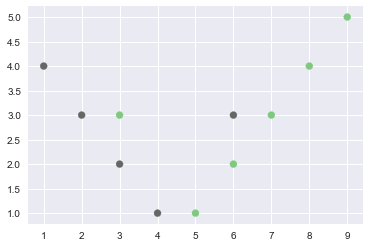

In [4]:
plt.scatter(A['X1'], A['X2'], cmap= 'Accent', c= A['Class'])

In [5]:
!pip install graphviz

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
!pip install pydotplus

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
mycols= ['X1', 'X2']

In [8]:
cl_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=1)
cl_tree= cl_tree.fit(A[['X1','X2']], A['Class'])


In [9]:
pred= cl_tree.predict(A[['X1', 'X2']])
print(pd.crosstab(A['Class'], pred))

col_0  0  1
Class      
0      5  1
1      1  4


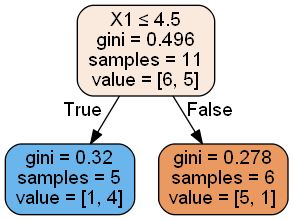

In [10]:
#to view the tree
dot_data=StringIO()
export_graphviz(cl_tree,out_file=dot_data, feature_names=mycols, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

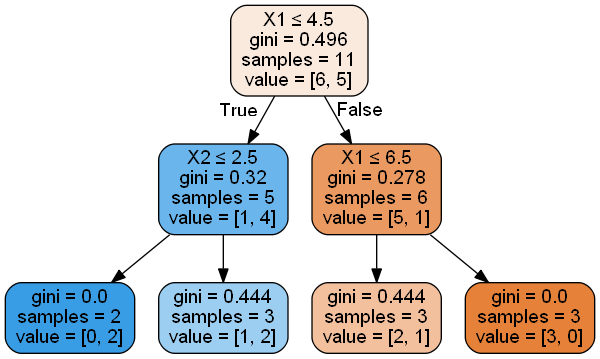

In [11]:
cl_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=2)
cl_tree= cl_tree.fit(A[['X1','X2']], A['Class'])


#to view the tree
dot_data=StringIO()
export_graphviz(cl_tree,out_file=dot_data, feature_names=mycols, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

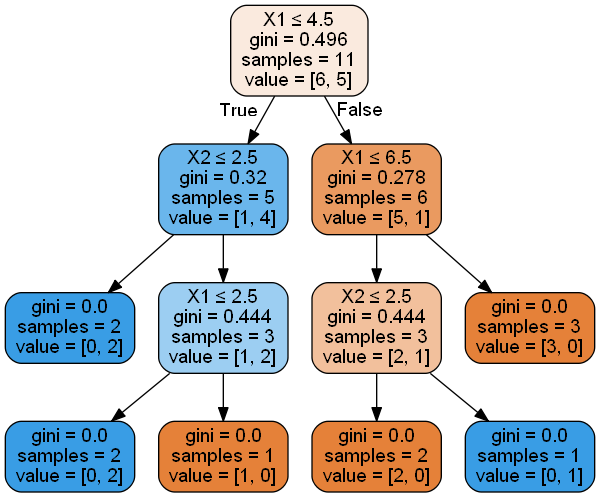

In [12]:
cl_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=3)
cl_tree= cl_tree.fit(A[['X1','X2']], A['Class'])


#to view the tree
dot_data=StringIO()
export_graphviz(cl_tree,out_file=dot_data, feature_names=mycols, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

In [13]:
B=pd.read_csv('prima-indians-diabetes.csv', header= None)

In [14]:
B.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
B.columns=['Preg', 'Glu', 'Bp', 'Sft', 'Ins','Bmi', 'Bpf', 'Age', 'Class']

In [16]:
x= B.drop(columns= ['Class'])
y= B['Class']

In [17]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [18]:
mycol= ['Preg', 'Glu', 'Bp', 'Sft', 'Ins','Bmi', 'Bpf', 'Age']

In [19]:
c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=1)
c2_tree= c2_tree.fit(xtrain,ytrain)

In [20]:
pred1= c2_tree.predict(xtest)
print(pd.crosstab(ytest, pred1))

col_0    0   1
Class         
0      121  25
1       32  53


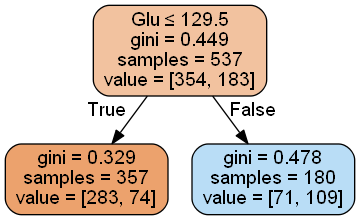

In [21]:
#to view the tree
dot_data=StringIO()
export_graphviz(c2_tree,out_file=dot_data, feature_names=mycol, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

In [22]:
b=pd.crosstab(ytest, pred1)
acc= (b[0][0]+b[1][1])/len(xtrain)

In [23]:
acc

0.3240223463687151

In [26]:
acc_test=[]
for i in range(1,20):
    c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=i)
    c2_tree= c2_tree.fit(xtrain,ytrain)
    pred1= c2_tree.predict(xtest)
    b=pd.crosstab(ytest, pred1)
    acc= (b[0][0]+b[1][1])/len(xtest)
    acc_test.append(acc)
acc_test
    

[0.7532467532467533,
 0.7575757575757576,
 0.7575757575757576,
 0.7619047619047619,
 0.7662337662337663,
 0.7316017316017316,
 0.7272727272727273,
 0.7272727272727273,
 0.7056277056277056,
 0.6926406926406926,
 0.683982683982684,
 0.6883116883116883,
 0.6926406926406926,
 0.6926406926406926,
 0.683982683982684,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883]

In [27]:
acc_train=[]
depth=[]
for i in range(1,20):
    c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=i)
    c2_tree= c2_tree.fit(xtrain,ytrain)
    pred1= c2_tree.predict(xtrain)
    b=pd.crosstab(ytrain, pred1)
    acc= (b[0][0]+b[1][1])/len(xtrain)
    acc_train.append(acc)
    depth.append(i)
acc_train

[0.7299813780260708,
 0.7635009310986964,
 0.7635009310986964,
 0.8044692737430168,
 0.8268156424581006,
 0.8715083798882681,
 0.8994413407821229,
 0.925512104283054,
 0.9459962756052142,
 0.9739292364990689,
 0.9869646182495344,
 0.994413407821229,
 0.9962756052141527,
 0.9962756052141527,
 0.9981378026070763,
 1.0,
 1.0,
 1.0,
 1.0]

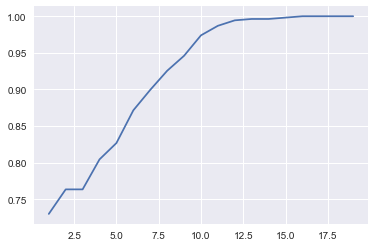

In [28]:
plt.plot(depth, acc_train)

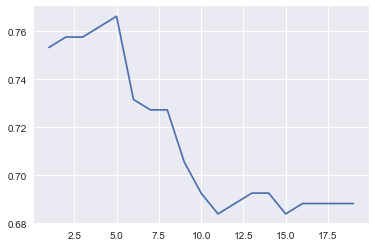

In [29]:
plt.plot(depth, acc_test)

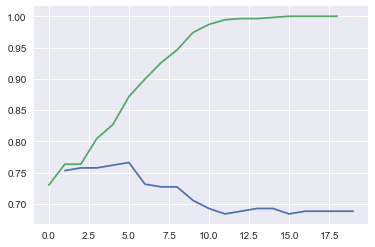

In [30]:
plt.plot(depth, acc_test, acc_train)

In [31]:
max(acc_test)

0.7662337662337663

In [32]:
df=pd.DataFrame([depth, acc_test, acc_train])

In [45]:
#df[df['acc_test']]= max(acc_test)

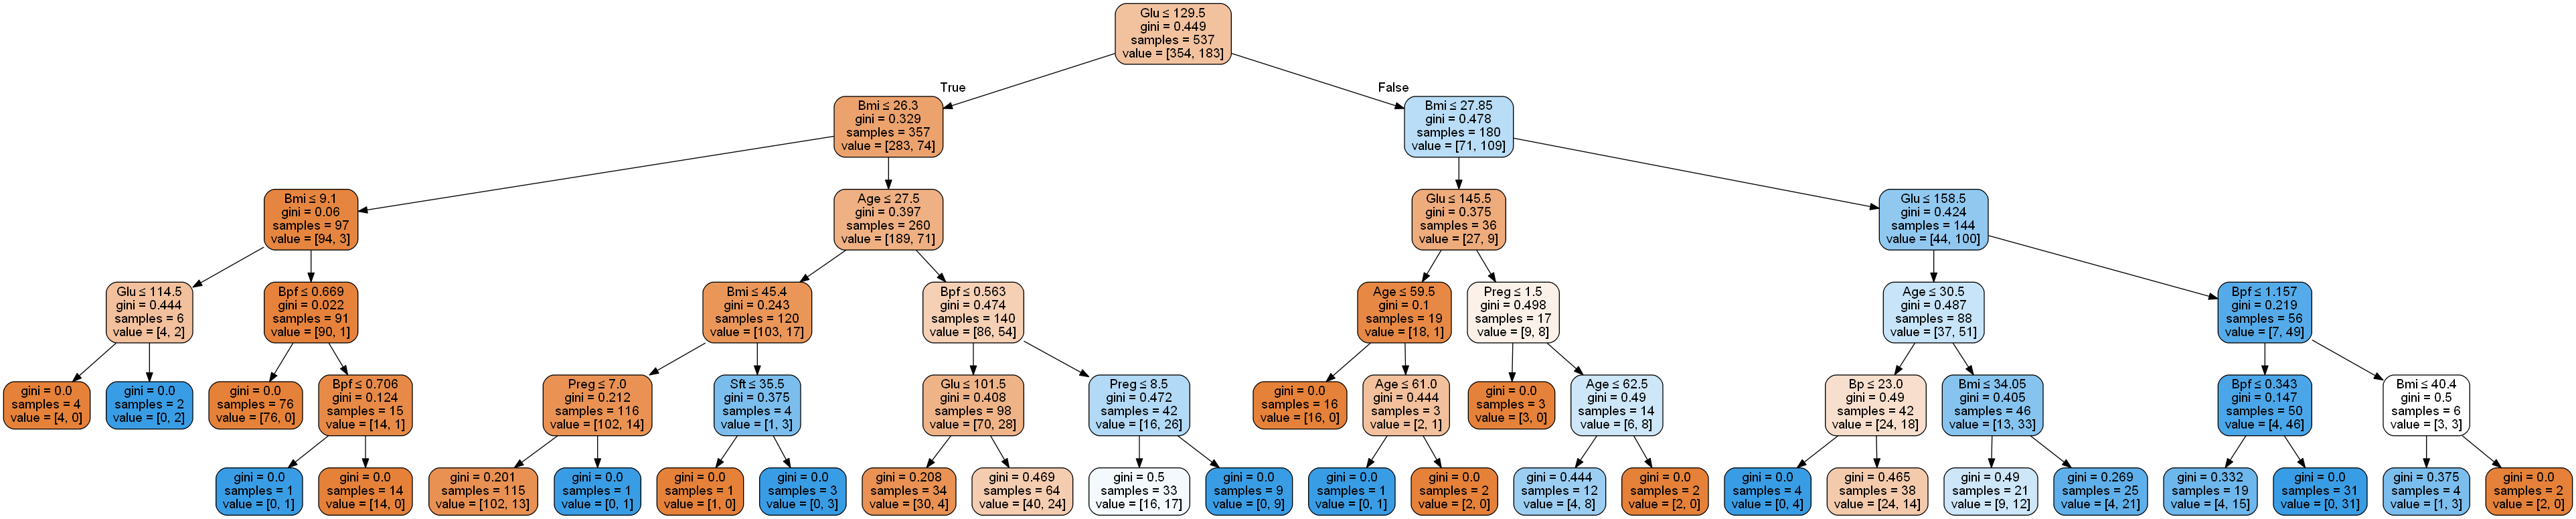

In [35]:
c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=5)
c2_tree= c2_tree.fit(xtrain,ytrain)


#to view the tree
dot_data=StringIO()
export_graphviz(c2_tree,out_file=dot_data, feature_names=mycol, filled= True, rounded =True, special_characters= True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

In [36]:
err_test=[]
for i in range(1,20):
    c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=i)
    c2_tree= c2_tree.fit(xtrain,ytrain)
    pred1= c2_tree.predict(xtest)
    b=pd.crosstab(ytest, pred1)
    err= (b[0][1]+b[1][0])/len(xtest)
    err_test.append(err)
err_test

[0.24675324675324675,
 0.24242424242424243,
 0.24242424242424243,
 0.23809523809523808,
 0.23376623376623376,
 0.2683982683982684,
 0.2727272727272727,
 0.2727272727272727,
 0.2943722943722944,
 0.30735930735930733,
 0.31601731601731603,
 0.3116883116883117,
 0.30735930735930733,
 0.30735930735930733,
 0.31601731601731603,
 0.3116883116883117,
 0.3116883116883117,
 0.3116883116883117,
 0.3116883116883117]

In [39]:
err_train=[]
depth=[]
for i in range(1,20):
    c2_tree= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=i)
    c2_tree= c2_tree.fit(xtrain,ytrain)
    pred1= c2_tree.predict(xtrain)
    b=pd.crosstab(ytrain, pred1)
    err= (b[1][0]+b[0][1])/len(xtrain)
    err_train.append(err)
    depth.append(i)
err_train

[0.27001862197392923,
 0.23649906890130354,
 0.23649906890130354,
 0.19553072625698323,
 0.17318435754189945,
 0.12849162011173185,
 0.1005586592178771,
 0.074487895716946,
 0.054003724394785846,
 0.0260707635009311,
 0.01303538175046555,
 0.00558659217877095,
 0.0037243947858473,
 0.0037243947858473,
 0.00186219739292365,
 0.0,
 0.0,
 0.0,
 0.0]

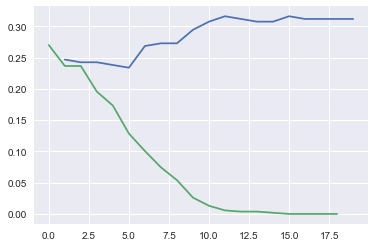

In [40]:
plt.plot(depth, err_test, err_train)

In [41]:
df1=pd.DataFrame([depth,err_test, err_train])
df.T

,0,1,2
0,1.0,0.753247,0.729981
1,2.0,0.757576,0.763501
2,3.0,0.757576,0.763501
3,4.0,0.761905,0.804469
4,5.0,0.766234,0.826816
5,6.0,0.731602,0.871508
6,7.0,0.727273,0.899441
7,8.0,0.727273,0.925512
8,9.0,0.705628,0.945996
9,10.0,0.692641,0.973929
